## Cho dữ liệu trong thư mục loan_prediction-1 chứa thông tin giao dịch cho vay của một ngân hàng 
## Trong phạm vi bài này, chúng ta chỉ xem xét tập tin X_train.csv và Y_train.csv, dùng để huấn luyện mô hình dự đoán cho vay hay không cho vay. 

## Phân tích thông tin sơ bộ về dữ liệu X_train (với các dữ liệu numeric như: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History). 
## Trực quan hóa dữ liệu. 

## Để việc dự đoán tốt hơn cần phải kiểm tra và chuẩn hóa dữ liệu. 
## Hãy chọn một phương pháp để chuẩn hóa dữ liệu dựa trên thông tin nêu trên. Trực quan hóa kết quả so sánh trước và sau chuẩn hóa.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read Y_train.csv into y_train
y_train = pd.read_csv('data4/Ex2_Loan_Prediction/Y_train.csv')
y_train.value_counts()

Target
Y         271
N         113
Name: count, dtype: int64

In [6]:
#Read X_train.csv into loan variable
x_train = pd.read_csv('data4/Ex2_Loan_Prediction/X_train.csv')
x_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
379,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119,360,0,Rural
380,LP001841,Male,No,0,Not Graduate,Yes,2583,2167.0,104,360,1,Rural
381,LP002820,Male,Yes,0,Graduate,No,5923,2054.0,211,360,1,Rural
382,LP001744,Male,No,0,Graduate,No,2971,2791.0,144,360,1,Semiurban


In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            384 non-null    object 
 1   Gender             384 non-null    object 
 2   Married            384 non-null    object 
 3   Dependents         384 non-null    object 
 4   Education          384 non-null    object 
 5   Self_Employed      384 non-null    object 
 6   ApplicantIncome    384 non-null    int64  
 7   CoapplicantIncome  384 non-null    float64
 8   LoanAmount         384 non-null    int64  
 9   Loan_Amount_Term   384 non-null    int64  
 10  Credit_History     384 non-null    int64  
 11  Property_Area      384 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 36.1+ KB


In [10]:
x_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [12]:
lst_needed_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in lst_needed_columns:
    if len(x_train[col].unique()) > 20:
        print(f'{col} .... {len(x_train[col].unique())} unique values .... quantitative variable\n')
    else:
        print(f'{col} .... {len(x_train[col].unique())} unique values .... categorical variable: {x_train[col].unique()}\n')

ApplicantIncome .... 337 unique values .... quantitative variable

CoapplicantIncome .... 194 unique values .... quantitative variable

LoanAmount .... 167 unique values .... quantitative variable

Loan_Amount_Term .... 9 unique values .... categorical variable: [360 480 180 300 120  84 240  60  36]

Credit_History .... 2 unique values .... categorical variable: [1 0]



--------------------------------- ApplicantIncome ---------------------------------

ApplicantIncome skewness = 8.710750340721358
ApplicantIncome kurtosis = 111.74282946422429



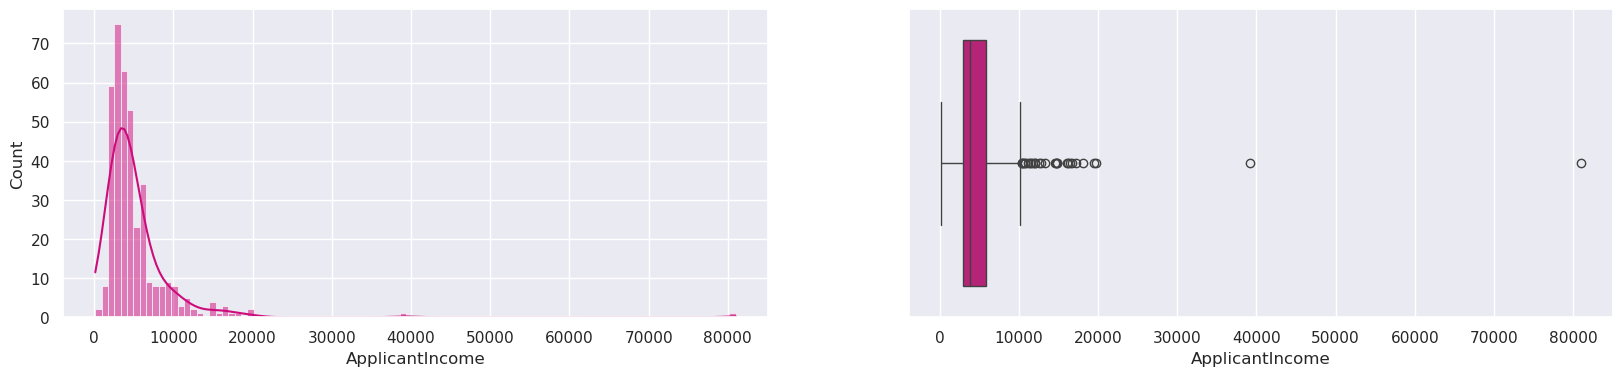


--------------------------------- CoapplicantIncome ---------------------------------

CoapplicantIncome skewness = 6.282578070382871
CoapplicantIncome kurtosis = 64.82271185363889



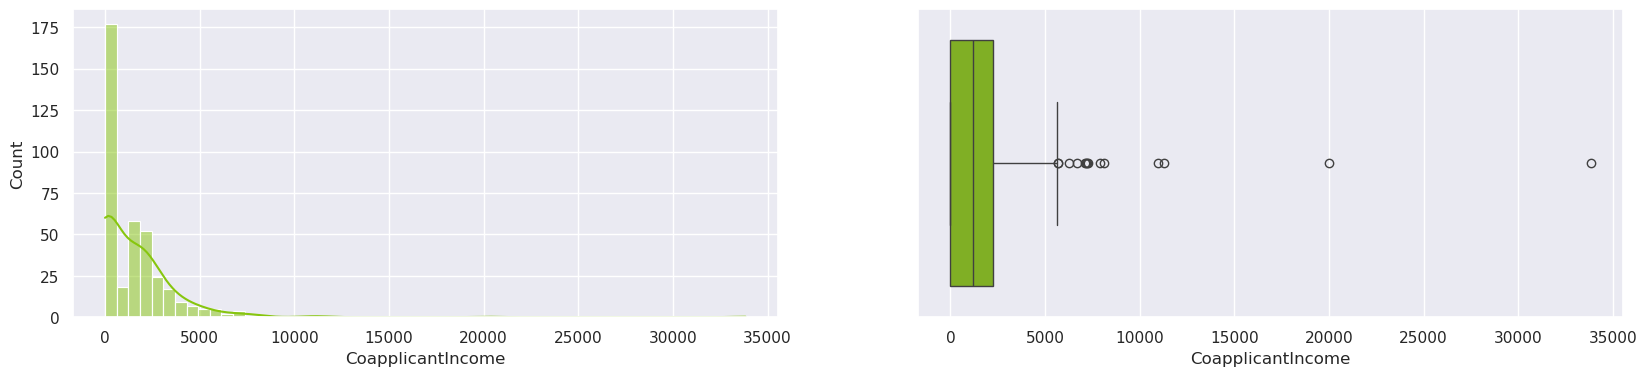


--------------------------------- LoanAmount ---------------------------------

LoanAmount skewness = 2.3205429771794557
LoanAmount kurtosis = 9.04167626698788



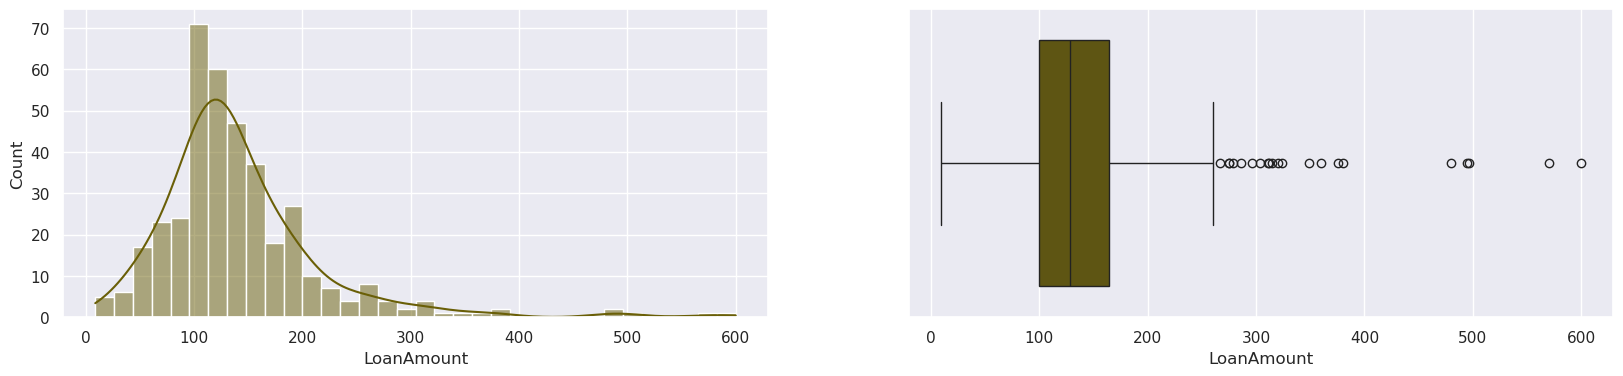

In [14]:
lst_quantitative = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
import random

for col in lst_quantitative:
    print(f'--------------------------------- {col} ---------------------------------')
    print(f'\n{col} skewness = {stats.skew(x_train[col])}')
    print(f'{col} kurtosis = {stats.kurtosis(x_train[col])}\n')

    hex_code = "#{:06x}".format(random.randint(0,0xFFFFFF))

    sbn.set_theme(style='darkgrid')
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sbn.histplot(x_train[col], color=hex_code, kde=True)
    
    plt.subplot(1,2,2)
    sbn.boxplot(x_train[col], color=hex_code, orient='h')
    plt.show()
    print()

## The quantitative features do not respect normal distribution, so cannot apply StandardScaler
## => Apply MinMaxScaler (or RobustScaler, read Ex2_2_RobustScaler_... file)
## => Must eliminate outliers before applying MinMaxScaler

In [17]:
#Eliminate outliers
x_train['Y_true'] = y_train

def remove_outliers_rows(data, column_list):
    index_to_drop = []
    for col in column_list:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
        condition = (data[col] < (q1 - iqr*1.5)) | (data[col] > (q3 + iqr*1.5)) #Condition to get outliers
        index_to_drop += data.loc[condition, col].index.to_list() #Get the index of outliers from data[col] pandas series, convert to list
    
    index_to_drop = list(set(index_to_drop)) #set to remove duplicate index values between variables
    data = data.drop(index_to_drop)
    return data.reset_index(drop=True)
    
x_train_no_outliers = remove_outliers_rows(x_train, lst_quantitative)
x_train_no_outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_true
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban,Y
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban,Y
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban,Y
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban,Y
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119,360,0,Rural,N
332,LP001841,Male,No,0,Not Graduate,Yes,2583,2167.0,104,360,1,Rural,Y
333,LP002820,Male,Yes,0,Graduate,No,5923,2054.0,211,360,1,Rural,Y
334,LP001744,Male,No,0,Graduate,No,2971,2791.0,144,360,1,Semiurban,Y


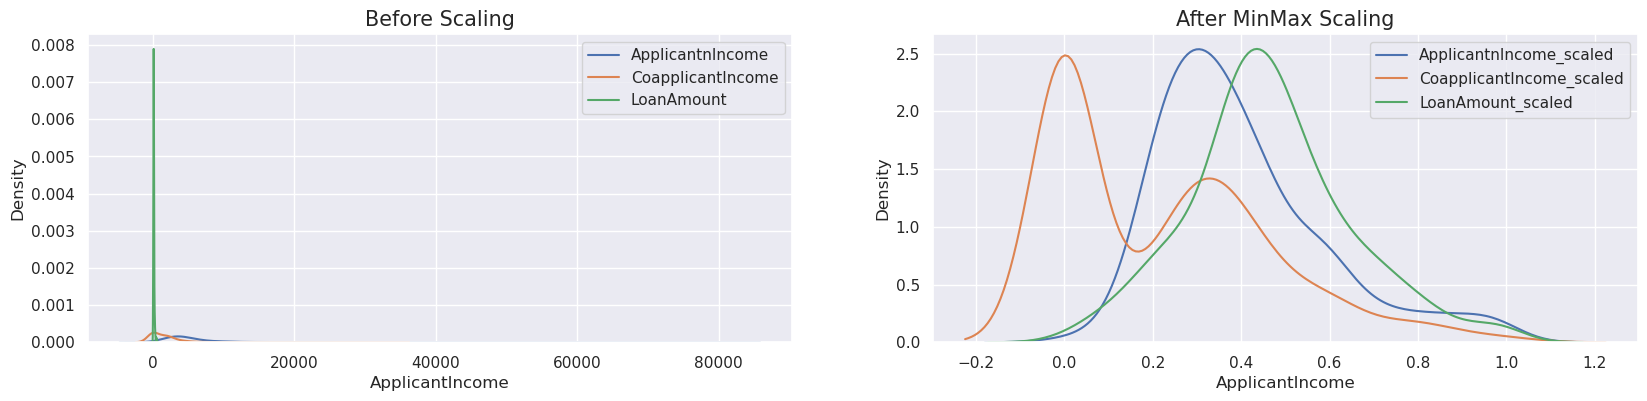

In [19]:
#Perform MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x_train_scaled = min_max.fit_transform(x_train_no_outliers[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
x_train_scaled = pd.DataFrame(x_train_scaled, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
  
#-Visualization
sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sbn.kdeplot(x_train['ApplicantIncome'], label="ApplicantnIncome")
sbn.kdeplot(x_train['CoapplicantIncome'], label='CoapplicantIncome')
sbn.kdeplot(x_train['LoanAmount'], label='LoanAmount')
plt.legend()
plt.title("Before Scaling", size=15)

plt.subplot(1,2,2)
sbn.kdeplot(x_train_scaled['ApplicantIncome'], label="ApplicantnIncome_scaled")
sbn.kdeplot(x_train_scaled['CoapplicantIncome'], label='CoapplicantIncome_scaled')
sbn.kdeplot(x_train_scaled['LoanAmount'], label='LoanAmount_scaled')
plt.legend()
plt.title("After MinMax Scaling", size=15)

plt.show()
print()

## Import Logistic Regression model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Train Logistic Regression model with min_max scaled data

In [25]:
log_model_minmax_scaled = LogisticRegression()
log_model_minmax_scaled.fit(x_train_scaled, x_train_no_outliers['Y_true'])
predict_values_scaled = log_model_minmax_scaled.predict(x_train_scaled)

accuracy_scaled = round(accuracy_score(y_pred=predict_values_scaled, y_true=x_train_no_outliers['Y_true']), 3)
print("Trained MinMax Scaled data accuracy:", accuracy_scaled)

Trained MinMax Scaled data accuracy: 0.824


## Train Logistic Regression model with raw data

In [28]:
log_model_minmax_raw = LogisticRegression()
log_model_minmax_raw.fit(x_train[lst_needed_columns], x_train['Y_true'])
predict_values_raw = log_model_minmax_scaled.predict(x_train[lst_needed_columns])

accuracy_raw = round(accuracy_score(y_pred=predict_values_raw, y_true=x_train['Y_true']), 3)
print("Accuracy when train with raw data:", accuracy_raw)

Accuracy when train with raw data: 0.706


## Results: the MinMaxScaler and removing outliers method have increased the accuracy of Logistic Regression model